### 1. 深度学习介绍&数据操作

#### 1.1 课程介绍
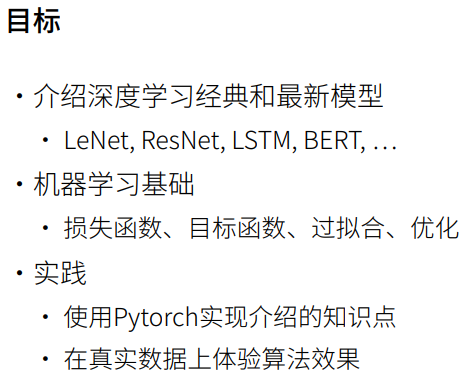 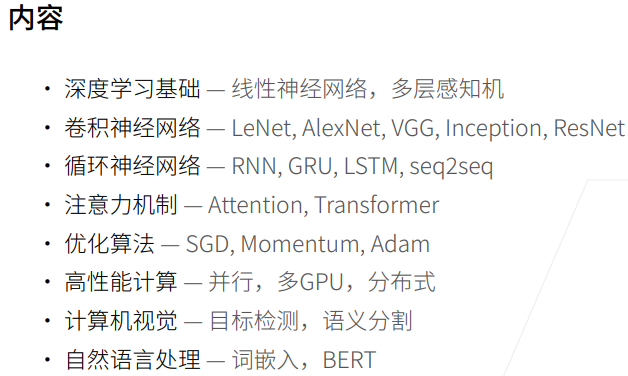  
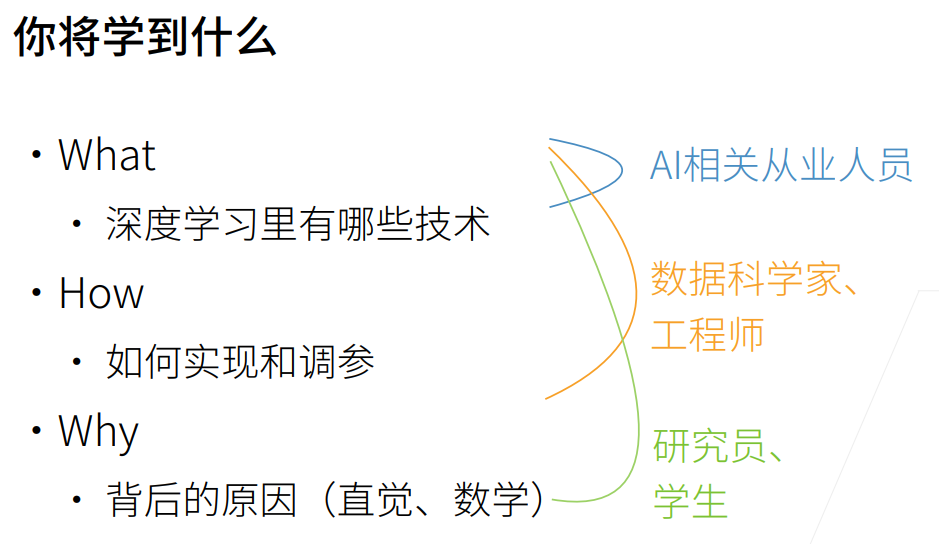

#### 1.2 深度学习介绍
**热门领域：**
1. 自然语言处理2. 计算机视觉

**实例：**
1. 图片分类
2. 物体检测与分割
3. 样式迁移
4. 人脸合成
5. 文字生成图片
6. 文字生成
7. 无人驾驶
8. 推荐系统

#### 1.3 安装


In [4]:
import torch
import d2l

#### 1.4 数据操作
1. 获取数据
2. 将数据读入计算机后对其进行处理

**N维数组：**  
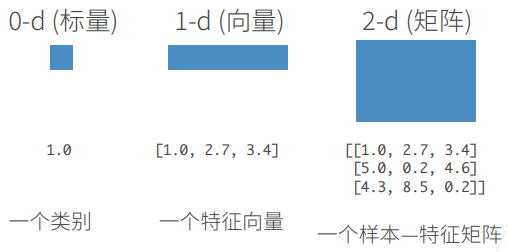  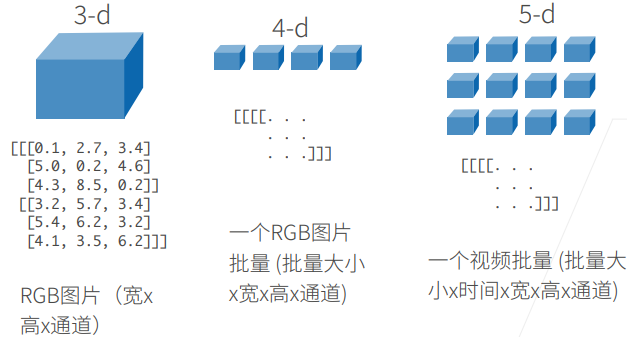  
**创建数组：** 
1. 数组形状
2. 每个元素数据类型
3. 每个元素的值
    
**访问元素**

**数据操作实现:**

In [5]:
import torch

In [6]:
x = torch.arange(12) #连续值
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [23]:
x.shape #形状

torch.Size([12])

In [24]:
x.numel() #元素个数

12

In [25]:
x = x.reshape(3, 4) #改变形状
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [33]:
x = torch.zeros((2, 3, 4)) # 2个3x4的全0张量
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [34]:
x = torch.ones((2, 3, 4)) # 2个3x4的全1张量
x

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [39]:
torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]).reshape(3, 3, 1) #创建指定的张量

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

In [62]:
#运算
x = torch.tensor([1.0, 2, 3])
y = torch.tensor([2, 3, 4])
x + y, x - y, x * y, x / y, x**y, torch.exp(x) 

(tensor([3., 5., 7.]),
 tensor([-1., -1., -1.]),
 tensor([ 2.,  6., 12.]),
 tensor([0.5000, 0.6667, 0.7500]),
 tensor([ 1.,  8., 81.]),
 tensor([ 2.7183,  7.3891, 20.0855]))

In [61]:
#连接
x = torch.arange(12).reshape(3, 4)
y = torch.ones((3, 4))
torch.cat((x, y), dim=0), torch.cat((x, y), dim=1) 

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  1.,  1.,  1.],
         [ 4.,  5.,  6.,  7.,  1.,  1.,  1.,  1.],
         [ 8.,  9., 10., 11.,  1.,  1.,  1.,  1.]]))

In [60]:
#求和
x.sum() 

tensor(6.)

In [59]:
#判断
x == y 

tensor([False, False, False])

In [58]:
#广播
a = torch.arange(3).reshape(1, 3)
b = torch.arange(2).reshape(2, 1)
a, b, a + b

(tensor([[0, 1, 2]]),
 tensor([[0],
         [1]]),
 tensor([[0, 1, 2],
         [1, 2, 3]]))

In [67]:
#切片
x = torch.arange(12).reshape(3, 4)
x, x[-1], x[1:3]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([ 8,  9, 10, 11]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [68]:
x[1, 2]

tensor(6)

In [69]:
x[0:2, :]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [78]:
#运行一些操作可能会为新结果分配内存
y = torch.arange(12).reshape(3, 4)
x = torch.arange(12).reshape(3, 4)
before = id(y)
y = y + x
id(y) == before

False

In [81]:
#原地操作
z = torch.zeros_like(y)
print(f"id(z):{id(z)}")
z[:] = x + y
print(f"id(z):{id(z)}")

id(z):2053742035600
id(z):2053742035600


In [82]:
# 对于重复使用的变量 可以使用 X[:] or X += Y 来减小开销
before = id(y)
y += x
id(y) == before

True

In [87]:
# 转 Numpy 张量
a = x.numpy()
b = torch.tensor(a)
a.dtype, b.dtype

(dtype('int64'), torch.int64)

In [89]:
# 张量转标量
a = torch.tensor([2.3])
a, a.item(), float(a), int(a)

(tensor([2.3000]), 2.299999952316284, 2.299999952316284, 2)

#### 1.5 数据预处理操作

**创建人工数据集：**

In [99]:
import os
'''
    os.makedirs(name, mode=511, exist_ok=False) ---> 用于递归创建多层目录
    参数:
    path -- 需要递归创建的目录，可以是相对或者绝对路径
    mode -- 权限模式，默认的模式为 511 (八进制)
    exist_ok：是否在目录存在时触发异常。如果 exist_ok 为 False（默认值），则在目标目录已存在的情况下触发 FileExistsError 异常；如果 exist_ok 为 True，则在目标目录已存在的情况下不会触发 FileExistsError 异常。

    os.path.join(path, *paths) ---> 用于路径拼接文件路径，可以传入多个路径
    返回值将是 path 和所有 *paths 成员的拼接
    如果不存在以'/'开始的参数，则函数会自动加上 存在以'/'开始的参数，从最后一个以'/'开头的参数开始拼接，之前的参数全部丢弃
'''
os.makedirs(os.path.join('D:/JupyterNotebookCode', 'txt'), exist_ok=True) 
data_file = os.path.join('D:/JupyterNotebookCode', 'txt', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

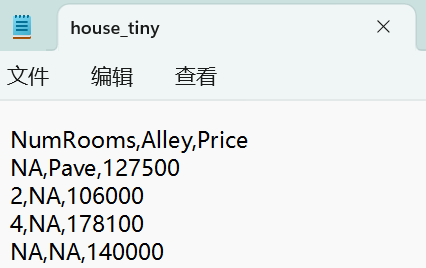

**加载数据集：**

In [24]:
import pandas as pd

data = pd.read_csv('D:/JupyterNotebookCode/txt/house_tiny.csv')
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


**插值处理缺失数据：**

In [33]:
inputs_before, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs_before.mean(numeric_only = True)) #忽略非数值
inputs_before, inputs

(   NumRooms Alley
 0       NaN  Pave
 1       2.0   NaN
 2       4.0   NaN
 3       NaN   NaN,
    NumRooms  Alley_Pave  Alley_nan
 0       3.0        True      False
 1       2.0       False       True
 2       4.0       False       True
 3       3.0       False       True)

**对于inputs中的类别值或离散值，我们将“NaN”视为一个类别:**

In [45]:
'''
    pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)实现one hot encode
    参数详解
    data : array-like, Series, or DataFrame 输入的数据
    prefix : string, get_dummies转换后，列名的前缀，默认为None
    columns : 指定需要实现类别转换的列名 否则转换所有类别性的列
    dummy_na : bool, default False 增加一列表示空缺值，如果False就忽略空缺值
    drop_first : bool, default False 获得k中的k-1个类别值，去除第一个,防止出现多重共线性
'''
inputs = pd.get_dummies(inputs, dummy_na=True, dtype=int)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,True,False
1,2.0,False,True
2,4.0,False,True
3,3.0,False,True


**转换为张量格式:**

In [46]:
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [55]:
import numpy as np
a = np.arange(12)
b = a.reshape((3, 4))
b[:] = 2
a, b

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]]))

### 2. 线性代数&自动求导

#### 2.1 线性代数及其实现

#### 2.2 矩阵计算

**标量的导数：** 导数是切线的斜率  
**亚导数：** 将导数拓展到不可微的函数  
**梯度：** 将导数拓展到向量 ---> 指向值变换最大的方向  

#### 2.3 自动求导

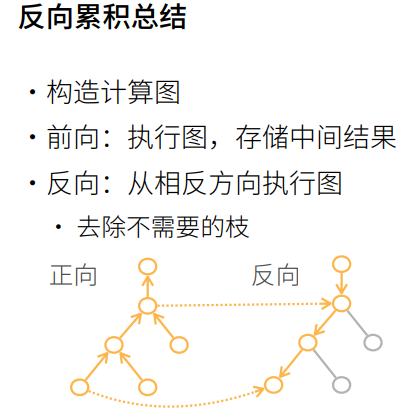 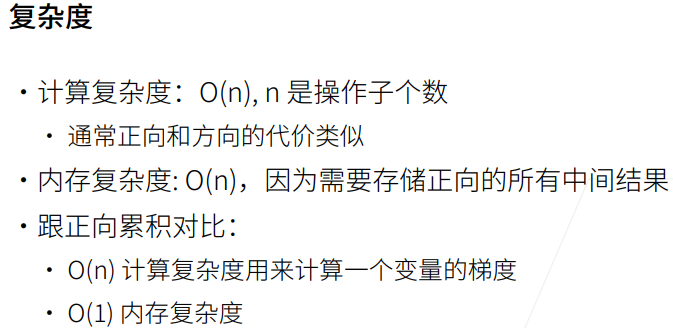

**向量梯度计算：**  

***
<a href="https://www.cnblogs.com/zhouyang209117/p/11023160.html">Pytorch中backward函数的gradient参数作用</a>

In [45]:
import torch

x = torch.arange(4.0)
# x.requires_grad = True
x.requires_grad_(True) # 开始追踪(track)在其上的所有操作（利用链式法则进行梯度传播了）
'''
    dot函数
    一维数组：计算两个一维数组的内积（即点积）
    二维数组：进行矩阵乘法
    多维数组：按照传统的矩阵乘法规则计算其对应的相乘
'''
# y = 2 * x.dot(x)
y = 2 * torch.dot(x, x)
y.backward()
print(x.grad) 
x.grad == 4*x

tensor([ 0.,  4.,  8., 12.])


tensor([True, True, True, True])

In [46]:
# x.grad.data.zero_()
x.grad.zero_() # 不对计算图梯度清零 后续计算梯度会累加
y = x.sum() # 不允许张量对张量求导，只允许标量对张量求导，求导结果是和自变量同形的张量。所以必要时我们要把张量通过将所有张量的元素加权求和的方式转换为标量
y.backward()
x.grad

tensor([1., 1., 1., 1.])

批量中每个样本单独计算偏导之和

In [47]:
x.grad.zero_() # grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [55]:
x.grad.zero_()
y = x * x
u = y.detach() # detach()的作用是返回一个 Tensor 和原张量的数据相同，但 requires_grad = False
z = u * x 

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [50]:
x.grad.zero_()
y.sum().backward()

x.grad == 2 * x 

tensor([True, True, True, True])

In [48]:
def f(a):
    b = a * 2
    '''
        1维sum(abs(A))
        2维sqrt(sum(abs(A.^2)))
        inf维max(sum(abs(A'))) ，其中sum(abs(A'))表示一行元素绝对值之和
    '''
    while b.norm() < 1000: 
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

# a = torch.randn(2, 3, requries_grad=True) # 服从标准正态分布（均值为0，方差为1，即高斯白噪声）中抽取的一组随机数
a = torch.randn(3, 4, requires_grad = True) 
d = f(a)
d.sum().backward()

a.grad == d / a

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### 3. 线性回归

#### 3.1 线性回归
线性模型可以看作是单层神经网络  
数据集称为训练数据集（training data set）或训练集（training set）  
每行数据（比如一次房屋交易相对应的数据）称为样本（sample），也可以称为数据点（data point）或数据样本（data instance）  
把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）   
预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）  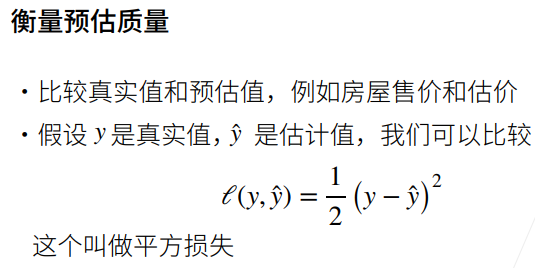 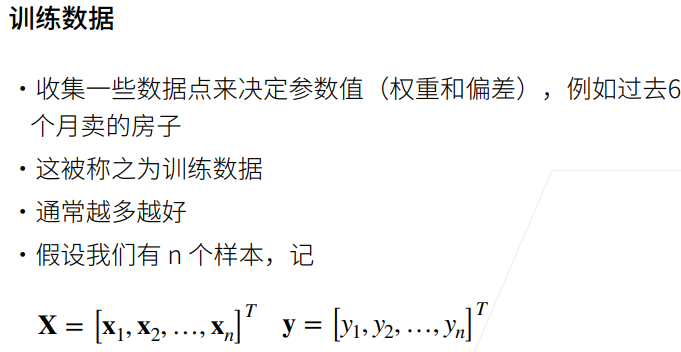
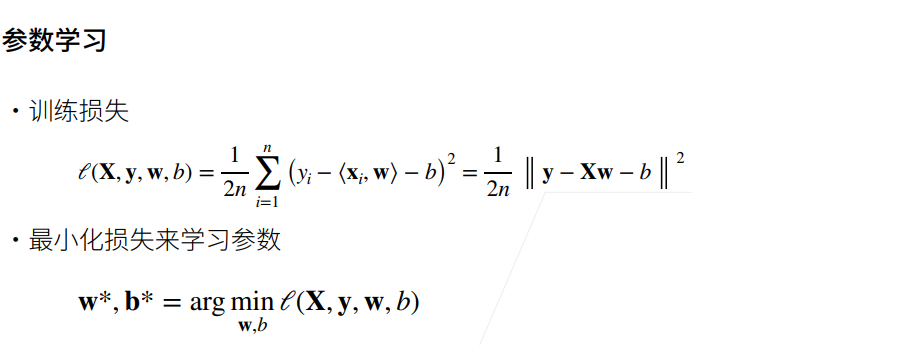 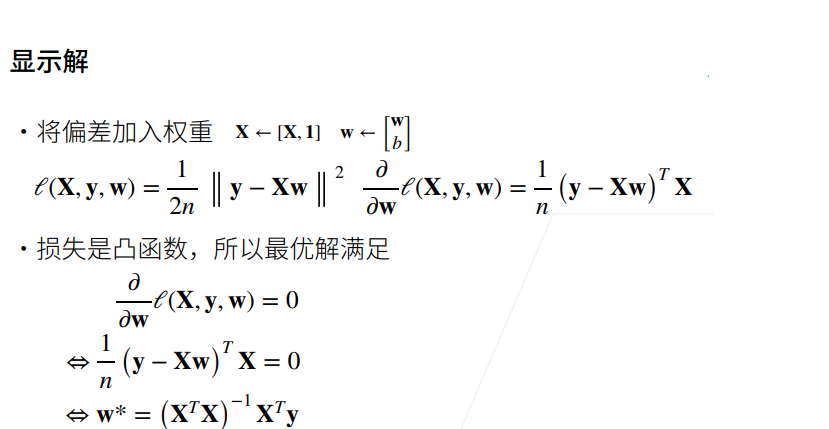


#### 3.2 基础优化算法
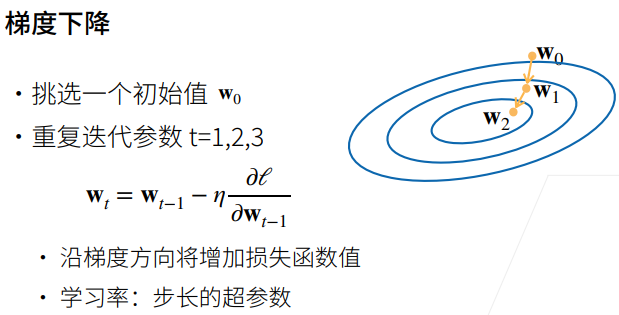 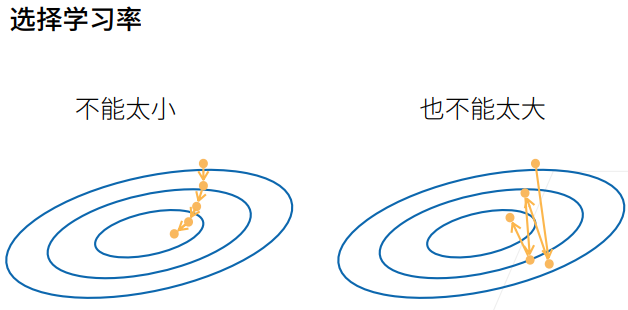
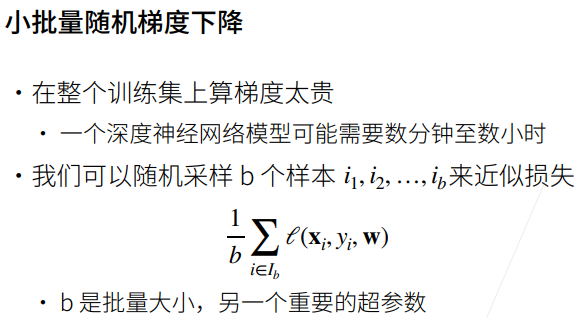  
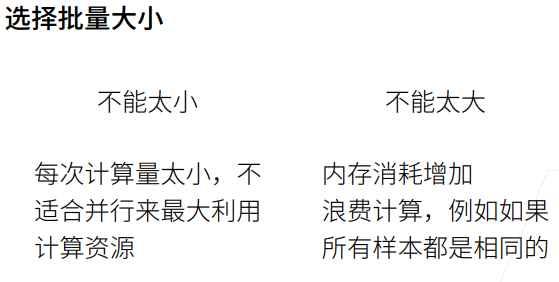

#### 3.3 从零开始实现线性回归

**生成数据集：**  
y = Xw + b +噪声  
1000个样本 2个特征

In [2]:
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    ''' 生成y = Xw + b +噪声 '''
    X = torch.normal(0, 1, (num_examples, len(w))) # 服从均值为 0 标准差为 1 的正态分布随机数  形状 num_examples * len(w)
    y = torch.matmul(X, w) + b # y = X*w + b
    y += torch.normal(0, 0.01, y.shape) # 加上噪声
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

**画features-labels散点图：**

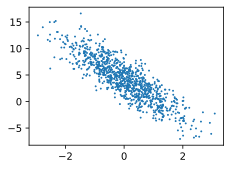

In [14]:
d2l.set_figsize()
# matplotlib.pyplot.scatter(x, y, s=None) s--->点的大小，默认 20
d2l.plt.scatter(features[:, 1].detach().numpy(), 
                labels.detach().numpy(), 1) 

***
<a href="https://docs.pythontab.com/interpy/Generators/Generators/">生成器</a>   

**读取数据：**  
小批量读取

In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成样本的标签
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices) # 打乱标签
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)]) 
        yield features[batch_indices], labels[batch_indices]

In [26]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.3856, -0.5696],
        [ 0.7038,  0.7160],
        [ 0.1154,  1.2822],
        [-0.0195,  0.1030],
        [ 0.5100,  2.2337],
        [ 0.1011,  0.2980],
        [-1.5111,  1.6810],
        [-0.5465, -0.9756],
        [-2.2241,  0.6660],
        [-0.3216, -0.2827]]) 
 tensor([[ 3.3587],
        [ 3.1916],
        [ 0.0633],
        [ 3.8064],
        [-2.3737],
        [ 3.3983],
        [-4.5186],
        [ 6.4365],
        [-2.5205],
        [ 4.5135]])


**初始化模型参数：**

In [27]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

**定义模型：**

In [28]:
def linreg(X, w, b):  
    """线性回归模型"""
    return torch.matmul(X, w) + b

**定义损失函数：**

In [29]:
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

**定义优化算法：**

In [30]:
def sgd(params, lr, batch_size): 
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

**定义优化算法：**

In [31]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.042389
epoch 2, loss 0.000163
epoch 3, loss 0.000048
epoch 4, loss 0.000048
epoch 5, loss 0.000048


In [80]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.7153, -1.7999], grad_fn=<SubBackward0>)
b的估计误差: tensor([1.7041], grad_fn=<RsubBackward1>)


#### 3.4 线性回归的简介实现

In [16]:
import numpy as np
import torch 
from torch.utils import data
from d2l import torch as d2l 

true_w = torch.tensor([2, -3.4])
ture_b = 4.2
'''
    def synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise.

    Defined in :numref:`sec_utils`"""
    X = d2l.normal(0, 1, (num_examples, len(w)))
    y = d2l.matmul(X, w) + b
    y += d2l.normal(0, 0.01, y.shape)
    return X, d2l.reshape(y, (-1, 1))
'''
features, labels = d2l.synthetic_data(true_w, ture_b, 1000) # 生成 y = Xw + b + 噪声

**读取数据：**

In [18]:
def load_array(data_arrays, batch_size, is_train=True):
    ''' 构造一个PyTorch数据迭代器 '''
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 0.3102,  0.0064],
         [ 2.1400, -1.0386],
         [-0.2432,  0.1242],
         [ 1.0440,  1.3490],
         [-0.4424, -0.0398],
         [ 0.1485,  0.0929],
         [ 1.5211,  0.1224],
         [ 1.0438,  1.1768],
         [-0.0116,  0.2242],
         [-1.1704, -0.8038]]),
 tensor([[ 4.7956],
         [12.0206],
         [ 3.2895],
         [ 1.7111],
         [ 3.4494],
         [ 4.1769],
         [ 6.8287],
         [ 2.2827],
         [ 3.3993],
         [ 4.6001]])]

**使用框架预定好的层：**

In [40]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) # list of layers 一个一个按顺序放在一起

**初始化模型参数：**

In [35]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

**定义损失函数：**

In [36]:
loss = nn.MSELoss()

**定义优化算法：**

In [37]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

**训练：**

In [38]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000178
epoch 2, loss 0.000101
epoch 3, loss 0.000101


In [39]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([0.0008, 0.0004])
b的估计误差： tensor([-0.0002])


Q：损失为什么要求平均？  
A：求不求均可。不求的话，会导致梯度比较大（N倍），也可以学习率求平均。  

Q：如何找到合适的学习率？  
A：1.使用对学习率不那么敏感的算法 2.合理的参数初始化

### 4. Softmax回归

#### 4.1 Softmax回归
回归估计一个连续值  
分类预测离散类别  
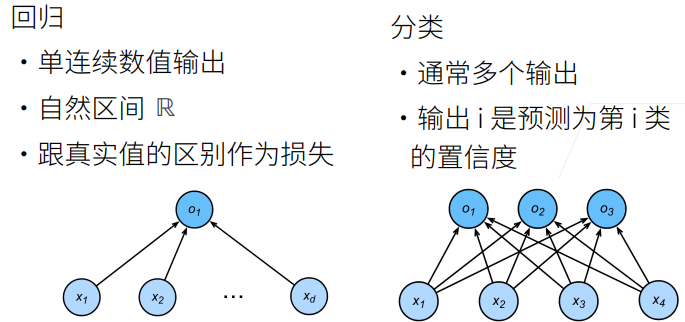  
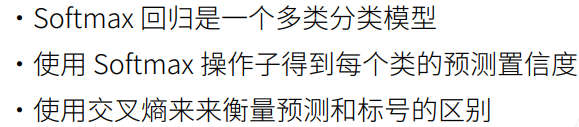

#### 4.2 损失函数
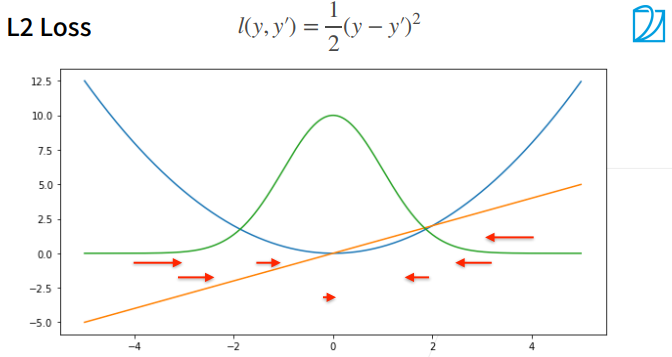 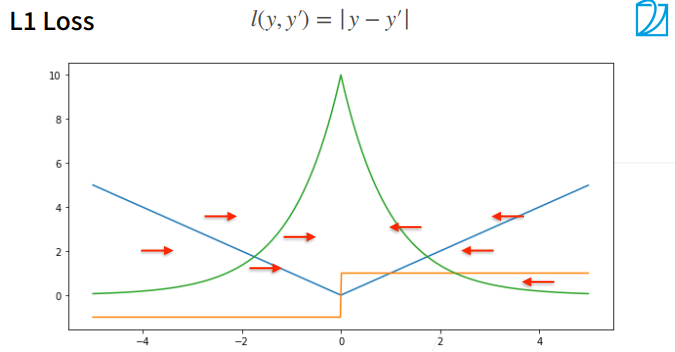  
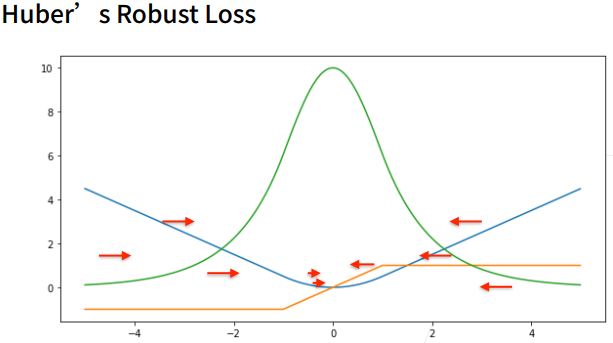

#### 4.3 图像分类数据集


In [23]:
import torch
import torchvision 
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

**下载数据并读取：**

In [24]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                                train=True, 
                                                transform=trans, 
                                                download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                               train=False, 
                                               transform=trans, 
                                               download=True)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [25]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

**可视化数据：**

In [26]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels] # 列表解析（List Comprehensions）---> 将一个列表（实际上适用于任何可迭代对象）转换成另一个列表

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

**几个样本图像及标签：**

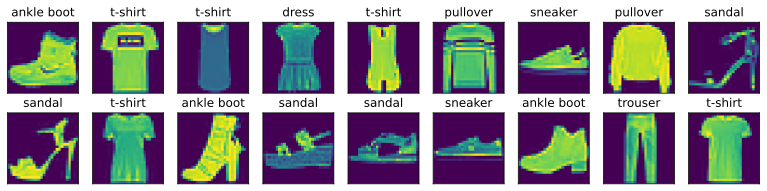

In [28]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18))) # next函数可以用于获取可迭代对象的下一个元素 结合iter函数一起使用，创建一个迭代器来遍历可迭代对象
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

**读小批量数据：**

In [42]:
batch_size = 256

def get_dataloader_workers():  
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [43]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'3.79 sec'

**整合所有组件：**

In [49]:
def load_data_fashion_mnist(batch_size, resize=None): 
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                                    train=True, 
                                                    transform=trans, 
                                                    download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                                   train=False, 
                                                   transform=trans, 
                                                   download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

#### 4.4 Softmax回归从零开始实现


In [54]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

**展平：**

In [55]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

**求和sum()降维**

In [58]:
X = torch.tensor([[1.0, 2.0, 3.0], 
                  [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

**实现softmax：**

In [61]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [62]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2464, 0.3365, 0.0208, 0.2971, 0.0992],
         [0.1273, 0.1133, 0.1817, 0.4332, 0.1446]]),
 tensor([1., 1.]))

**定义模型：**

In [64]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [71]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], 
                      [0.3, 0.2, 0.5]])
'''
    y = [0, 2]
    拿出y_hat中[0, 0] [1, 2]对应的值
'''
y_hat[[0, 1], y] 

tensor([0.1000, 0.5000])

**实现交叉熵损失函数：**

In [72]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

**预测值与真实值比较：**

In [29]:
def accuracy(y_hat, y): 
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [77]:
accuracy(y_hat, y) / len(y)

0.5

**评估任意模型的准确率：**

In [78]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [79]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [81]:
evaluate_accuracy(net, test_iter)

0.0851

**训练：**

In [83]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

**动画中绘制数据：**

In [85]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [96]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [87]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

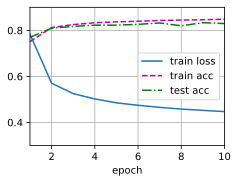

In [88]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

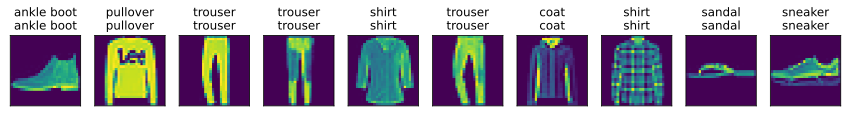

In [101]:
def predict_ch3(net, test_iter, n=10):  
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

#### 4.5 softmax回归的简洁实现

In [91]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

**初始化模型参数：**

In [92]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

**损失函数：**

In [93]:
loss = nn.CrossEntropyLoss(reduction='none')

**优化器：**

In [94]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

**训练：**

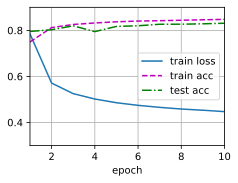

In [98]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 5. 感知机

#### 5.1 感知机